In [7]:
# %load ../../preconfig.py
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
plt.rcParams['axes.grid'] = False

#import numpy as np
#import pandas as pd

#import sklearn

#import itertools

import logging
logger = logging.getLogger()

def show_image(filename, figsize=None, res_dir=True):
    if figsize:
        plt.figure(figsize=figsize)

    if res_dir:
        filename = './res/{}'.format(filename)

    plt.imshow(plt.imread(filename))


26 Maximum Flow
================

each directed edge in a flow network like a conduit for the material: Each conduit has a stated capacity, vertices are conduit junctions.

In the maximum-flow problem, we wish to compute the greatest rate at which we can ship material from the source to the sink without violating any capacity constraints.

### 26.1 Flow networks
Let $G = (V, E)$ be a flow network with a capacity function $c$. 

Let $s$ be the source of the network, and let $t$ be the sink.

A **flow** in $G$ is a real-valued function $f : V \times V \to \mathcal{R}$ that satisfies the following two properties:

+ **Capacity constraint**: $0 \geq f(u, v) \geq c(u, v) : \forall u, v \in V$

+ **Flow conservation**: $$\displaystyle \sum_{v \in V} f(v, u) = \sum_{v \in V} f(u, v)$$

1. real-world flow problem may violates our assumption:     
modeling problems with antiparalled edges.

2. networks with multiple sources and sinks:      
add a **supersourse** and a **supersink**.

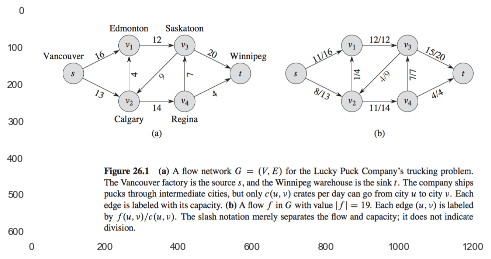

In [3]:
plt.imshow(plt.imread('./res/fig26_1.png'))

In [4]:
# Exercise

### 26.2 The Ford-Fulkerson method
The Ford-Fulkerson method depends on three important ideas: residual networks, augmenting paths, and cuts.

```c
FORD-FULKERSON-METHOD(G, s, t)
initialize flow f to 0

while there exists an augmenting path p in the residual network G_f
    augment flow f along p

return f
```

#### Residual networks
the residual network $G_f$ consists of edges with capacitites that represent how we can change the flow on edges of $G$.

we define the **residual capacity** $c_f(u, v)$ by 
\begin{equation}
    c_f(u, v) = \begin{cases}
        c(u, v) - f(u, v) \, & \text{ if } (u, v) \in E \\
        f(v, u) \, & \text{ if } (v, u) \in E \\
        0 \, & \text{ otherwise}
    \end{cases}
\end{equation}

the **residual network** of $G$ induced by $f$ is $G_f = (V, E_f)$, where
$$E_f = \{ (u, v) \in V \times V : c_f(u, v) > 0 \}$$

If $f$ is a flow in $G$ and $f'$ is a flow in the corresponding residual network $G_f$, we define$f \uparrow f'$, the **augmentation** of flow $f$ by $f'$:
\begin{equation}
    (f \uparrow f')(u, v) = \begin{cases}
        f(u, v) + f'(u, v) - f'(v, u) \, & \text{ if } (u, v) \in E \\
        0 \, & \text{ otherwise}
    \end{cases}
\end{equation}

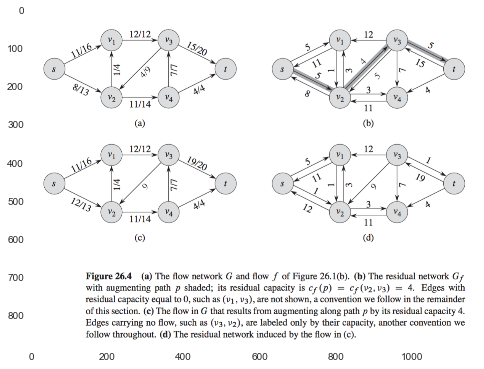

In [9]:
show_image('fig26_4.png', figsize=(8,12))

#### Augmenting paths
an **augmenting path** $p$ is a simple path from $s$ to $t$ in the residual network $G_f$.

$$c_f(p) = \min \{ c_f(u, v): \text{ $(u, v)$ is on $p$} \}$$

#### Cuts of flow networks
The Ford-Fulkerson method repeatedly augments the flow along augmenting paths until it has found a maximum flow.

The max-flow min-cut theorem tells us that a flow is maximum if and only if its residual network contains no augmenting path.

#### The basic Ford-Fulkerson algorithm

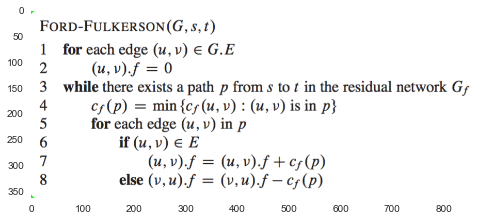

In [10]:
show_image('ford.png')

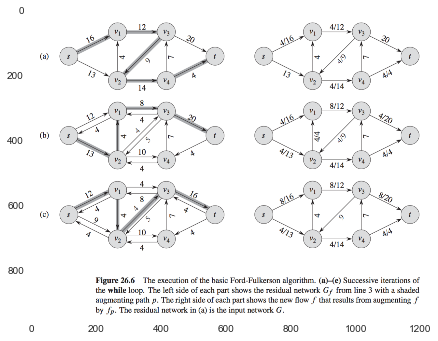

In [11]:
show_image('fig26_6.png')

#### The Edmonds-Karp algorithm
We can improve the boudn of FORD-FULKERSON by finding the augmenting path $p$ in line 3 with a breadth-first search.

In [13]:
#Exercise

### 26.3 Maximum bipartite matching
a maximum matching in a bipartite graph $G$ corresponds to a maximum flow in its corresponding flow network $G'$, and we can therefore compute a maximum matching in $G$ by running a maximum-flow algorithm on $G'$.

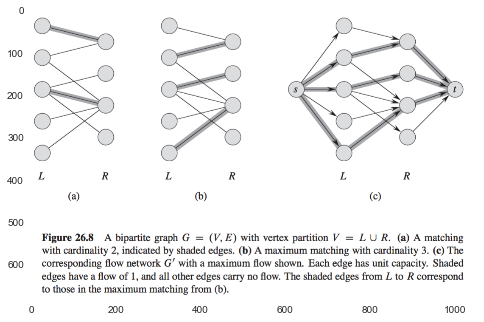

In [14]:
show_image('fig26_8.png')

In [15]:
#Exercise

### 26.4 Push-relabel algorithms